## Applied Statistics - Autumn 2024/25

##### Liliana Pereira - G00411560

### Project: Analysis of the PlantGrowth Dataset

#### Problem Statement


The **PlantGrowth** dataset is a well-known dataset in statistical and experimental research. It contains observations on the weight of plants grown under three distinct conditions: a control group (`ctrl`), and two treatment groups (`trt1` and `trt2`). Each group contains 10 observations. 

This project aims to:
1. Analyze the dataset to understand its characteristics and distributions.
2. Perform statistical tests to evaluate the effectiveness of the treatments:
   - A **t-test** to determine if there is a significant difference between the two treatment groups (`trt1` and `trt2`).
   - A **one-way ANOVA** to evaluate if the three groups (`ctrl`, `trt1`, and `trt2`) have significantly different means.
3. Discuss the appropriateness of using ANOVA over multiple t-tests for comparing more than two groups.
4. Validate statistical assumptions such as normality and homogeneity of variance.
5. Provide visualizations to support statistical findings.

#### Table of Contents


1. **Introduction**: Background and relevance.
2. **Importing Libraries**: Required tools for computation and visualization.
3. **Dataset Description**: Dataset loading and structure.
4. **Exploratory Data Analysis (EDA)**: Visualizations and initial observations.
5. **Statistical Assumptions**: Validating normality and variance assumptions.
6. **t-Test Analysis**: Comparing treatment groups.
7. **One-Way ANOVA**: Evaluating differences across all groups.
8. **Discussion**: Insights from analysis.
9. **Conclusion**: Summary of findings and implications.
10. **References**: Supporting resources.

### 1. Introduction


The PlantGrowth dataset is a fundamental resource for understanding experimental treatment effects on plant growth. This project focuses on hypothesis testing techniques, t-tests and ANOVA to assess whether treatments significantly impact plant weights. Using Python, we explore the data, validate assumptions, perform statistical tests, and visualize results to draw meaningful conclusions.


### **2. Importing Libraries**

The following libraries are essential for this project:

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.factorplots import interaction_plot

### **3. Dataset Description**


#### Dataset Overview

The PlantGrowth dataset consists of 30 observations equally divided into three groups:

1. **Control group (`ctrl`)**: Plants grown under standard conditions.
2. **Treatment group 1 (`trt1`)**: Plants grown with treatment 1 applied.
3. **Treatment group 2 (`trt2`)**: Plants grown with treatment 2 applied.

Each observation includes the dried weight of a plant, measured in grams, and the group it belongs to.

#### Loading and Inspecting the Data

In [2]:
# Load Dataset

# Load the PlantGrowth dataset

# file_path = 'dataFile\\PlantGrowth.csv'  
data_url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv"

# plant_data = pd.read_csv(file_path)
df = pd.read_csv(data_url)

In [3]:
# Keep relevant columns

df = df[['weight', 'group']]

In [4]:
# Display the first few rows
print("Dataset Overview:")
print(df.head())

Dataset Overview:
   weight group
0    4.17  ctrl
1    5.58  ctrl
2    5.18  ctrl
3    6.11  ctrl
4    4.50  ctrl


#### Summary Statistics

In [5]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          weight
count  30.000000
mean    5.073000
std     0.701192
min     3.590000
25%     4.550000
50%     5.155000
75%     5.530000
max     6.310000


In [6]:
# Check the distribution of groups
print("\nGroup Distribution:")
print(df['group'].value_counts())


Group Distribution:
ctrl    10
trt1    10
trt2    10
Name: group, dtype: int64


In [7]:
# Dataset Description

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          weight
count  30.000000
mean    5.073000
std     0.701192
min     3.590000
25%     4.550000
50%     5.155000
75%     5.530000
max     6.310000


In [8]:
# Display dataset structure
print("Dataset Overview:")
print(df.head())  # Displays the first 5 rows
print(df.info())  # Displays data type and non-null count


Dataset Overview:
   weight group
0    4.17  ctrl
1    5.58  ctrl
2    5.18  ctrl
3    6.11  ctrl
4    4.50  ctrl
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  30 non-null     float64
 1   group   30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes
None


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values if missing_values.any() else "No missing values detected.")


Missing Values:
No missing values detected.


#### Observations

- The dataset includes an equal number of samples (10) in each group, ensuring fair representation of conditions.
- The `weight` column represents continuous numerical data, while the `group` column categorizes the plants into three distinct groups.
- This well-organized structure is suitable for statistical analyses, such as t-tests and ANOVA, to assess differences among groups.

### **4. Exploratory Data Analysis (EDA)**


#### Boxplot: Comparing Groups

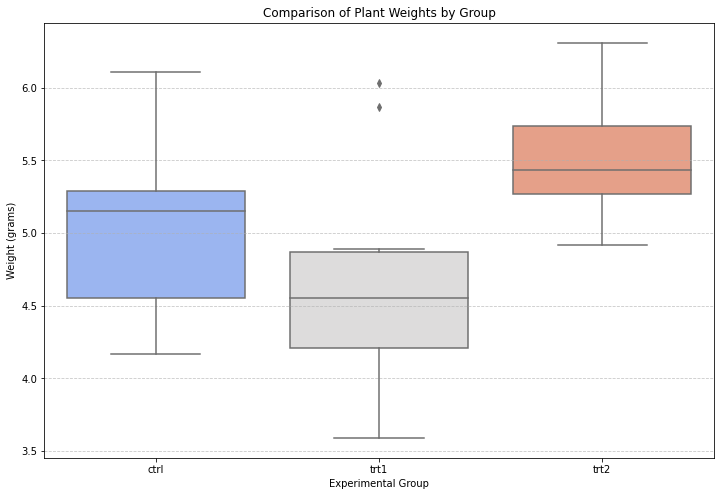

In [10]:
# Boxplot: Comparison of Plant Weights by Group
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='group', y='weight', palette='coolwarm')
plt.title("Comparison of Plant Weights by Group")
plt.xlabel("Experimental Group")
plt.ylabel("Weight (grams)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Explanation of the Results:

#### Purpose:
The boxplot provides a summary of the distribution of plant weights for each group (`ctrl`, `trt1`, and `trt2`) using descriptive statistics:
- **Median**: Represented by the line inside each box.
- **Interquartile Range (IQR)**: The box represents the middle 50% of the data (from the 25th to 75th percentiles).
- **Whiskers**: Extend to the smallest and largest values within 1.5 times the IQR.
- **Outliers**: Points outside the whiskers indicate potential outliers.

#### Observations:
1. **Control Group (`ctrl`)**:
   - The median weight is around 5 grams, with a relatively tight IQR, indicating low variability.
   - No apparent outliers are observed for this group.
   

2. **Treatment Group 1 (`trt1`)**:
   - The median weight is slightly lower than that of `ctrl`.
   - The IQR is wider compared to `ctrl`, indicating higher variability in plant weights.
   - A few weights are lower than the whisker range, suggesting potential outliers.
   

3. **Treatment Group 2 (`trt2`)**:
   - The median weight is higher than both `ctrl` and `trt1`, suggesting that the treatment might have a positive effect on plant growth.
   - The IQR is narrower than `trt1`, indicating less variability in weights within this group.
   - No apparent outliers are observed.
   

#### Comparison Across Groups:
- **Median Differences**:
  - The `trt2` group has the highest median weight, followed by `ctrl` and `trt1`.
- **Variability**:
  - The `trt1` group exhibits the highest variability, as seen in its larger IQR and presence of outliers.
  - The `ctrl` and `trt2` groups have more compact distributions.

#### Implications for Statistical Analysis:
- The boxplot suggests a potential treatment effect for `trt2`, as its median weight is noticeably higher than the other groups.
- The variability in `trt1` highlights the importance of considering both central tendencies and dispersion in the analysis.
- Statistical tests, such as t-tests and ANOVA, are required to confirm whether these observed differences are statistically significant.

The boxplot is a simple yet powerful tool to visually compare group distributions, setting the foundation for hypothesis testing.


#### Density Plot: Weight Distributions

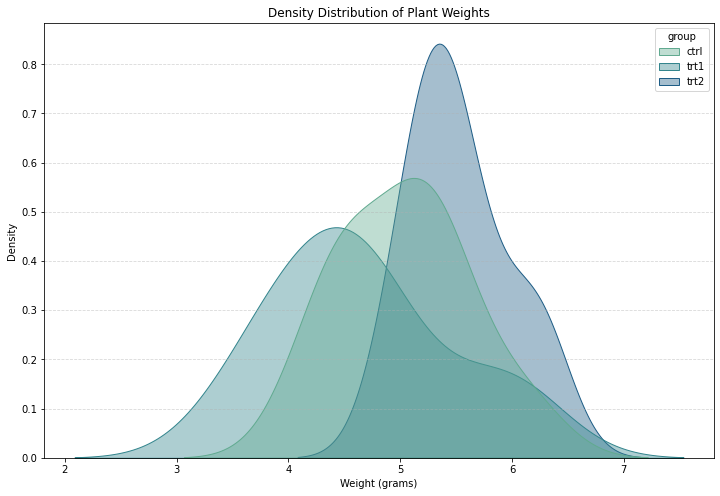

In [11]:
# Density plot for group distributions
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='weight', hue='group', fill=True, common_norm=False, alpha=0.4, palette='crest')
plt.title("Density Distribution of Plant Weights")
plt.xlabel("Weight (grams)")
plt.ylabel("Density")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Explanation of the Results:

#### Purpose:
The density plot provides a smoothed representation of the distribution of plant weights for each group (`ctrl`, `trt1`, `trt2`). By using Kernel Density Estimation (KDE):
- It visualizes the shape of the distributions without relying on binning, unlike histograms.
- The `fill=True` parameter highlights the areas under the density curves for better visual contrast between groups.

#### Observations:
1. **Control Group (`ctrl`)**:
   - The density curve shows a peak around 5 grams, indicating that most plant weights are concentrated near this value.
   - The curve is narrow, reflecting low variability within this group.
   

2. **Treatment Group 1 (`trt1`)**:
   - The curve for `trt1` is broader compared to `ctrl`, showing greater variability in plant weights.
   - The density is slightly shifted toward the lower end (~4 grams), suggesting some plants had smaller weights.
   

3. **Treatment Group 2 (`trt2`)**:
   - The `trt2` curve is distinctly shifted toward higher weights (~6 grams).
   - The curve is narrower and peaks higher compared to `trt1`, indicating that most weights are tightly clustered around the mean.

#### Overlap and Differences:
- The `ctrl` and `trt1` density curves overlap significantly, suggesting similarities in their weight distributions.
- The `trt2` curve shows minimal overlap with `ctrl` and `trt1`, indicating potential differences in plant weights due to the treatment.

#### Visual Insights:
- **Group Trends**: The density plot highlights distinct group trends, with `trt2` standing out due to its higher weight distribution.
- **Variability**: The broader curve for `trt1` indicates higher variability compared to the more concentrated distributions for `ctrl` and `trt2`.

#### Implications for Statistical Analysis:
- The density plot suggests that `trt2` has a distinct effect on plant weights, likely leading to a higher mean compared to the other groups.
- The significant overlap between `ctrl` and `trt1` distributions suggests that these groups might not have statistically significant differences in their means.
- This plot sets the stage for further hypothesis testing, such as t-tests and ANOVA, to confirm these observations quantitatively.


#### Violin Plot: Comparing Groups

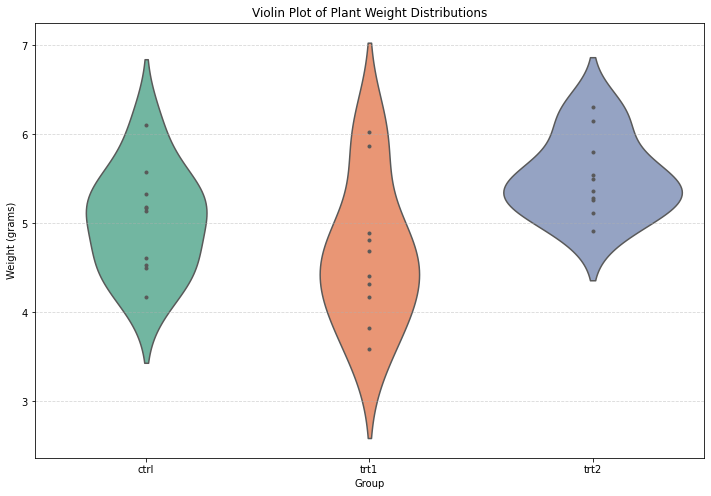

In [12]:
# Create a violin plot to visualize weight distributions across groups
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='group', y='weight', palette='Set2', inner='point')
plt.title("Violin Plot of Plant Weight Distributions")
plt.xlabel("Group")
plt.ylabel("Weight (grams)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Explanation of the Results:

#### Purpose:
The violin plot provides a detailed representation of the distribution of plant weights for each group (`ctrl`, `trt1`, and `trt2`), combining features of boxplots and density plots:
- **Inner Points**: Individual data points are displayed within each violin, showing the actual observed values.
- **Density Shape**: The width of the violin at a given height reflects the density of data points in that range, providing insights into the distribution's shape.

#### Group-Specific Observations:
1. **Control Group (`ctrl`)**:
   - The shape of the violin indicates a symmetric and concentrated distribution around 5 grams.
   - There are no outliers, and the group appears tightly clustered.

2. **Treatment Group 1 (`trt1`)**:
   - The violin is wider at the lower end, suggesting that some plants had relatively lower weights (~4 grams).
   - The inner points indicate more variability in weights compared to the control group.

3. **Treatment Group 2 (`trt2`)**:
   - The violin is elongated toward higher weights (~6.5 grams), with the bulk of the distribution clustered near the upper end.
   - This group's weights appear skewed toward higher values, indicating a potentially stronger treatment effect.

#### Overlap and Differences:
- The control group (`ctrl`) and treatment group 1 (`trt1`) show significant overlap in their distributions, suggesting that their weight means might not differ substantially.
- Treatment group 2 (`trt2`) appears distinct, with a higher density of larger weights compared to the other two groups, suggesting a potential difference in treatment effects.

#### Implications for Statistical Analysis:
- The violin plot visually indicates that `trt2` might have a significant positive effect on plant growth compared to `ctrl` and `trt1`.
- The overlap between `ctrl` and `trt1` implies that differences in their means may not be statistically significant, but formal testing (t-tests and ANOVA) is necessary to validate this observation.
- The inner points provide an additional layer of transparency by showing individual observations, reinforcing the visual trends in the data.


#### Histogram Analysis: Plant Weights by Group

The following histogram visualizes the weight distribution of plants across the three experimental groups: `ctrl`, `trt1`, and `trt2`.

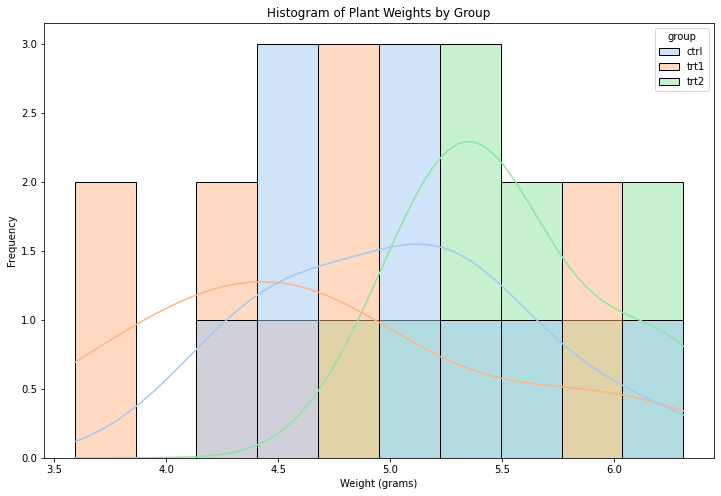

In [13]:
# Visualizing the histogram for the weight distribution of plants across groups
plt.figure(figsize=(12, 8)) 
sns.histplot(data=df, x='weight', hue='group', kde=True, palette='pastel', bins=10)
plt.title("Histogram of Plant Weights by Group")
plt.xlabel("Weight (grams)")
plt.ylabel("Frequency")
plt.show()


### Observations:

#### Purpose:
- The histogram provides a visual representation of how plant weights are distributed across the three groups: `ctrl`, `trt1`, and `trt2`.
- Each group is color-coded using the pastel palette, making it easier to differentiate between them.
- The Kernel Density Estimate (KDE) overlaid on the histogram smooths out the frequency data, showing the density curve for each group.

#### Group-Specific Insights:

1. **Control Group (`ctrl`)**:
   - The weights are concentrated around 5 grams, with a relatively narrow range.
   - The KDE curve shows a sharp peak, suggesting that the group has low variability in weights.
   

2. **Treatment Group 1 (`trt1`)**:
   - The weight distribution is slightly wider compared to the control group, with observations starting as low as ~4 grams.
   - The KDE curve suggests moderate variability in plant weights.
   

3. **Treatment Group 2 (`trt2`)**:
   - The weight distribution is shifted toward higher values compared to `ctrl` and `trt1`.
   - The KDE curve has a distinct peak near the higher end, indicating tighter clustering of weights around the mean.

#### Overlap and Differences:
- There is significant overlap between the distributions of `ctrl` and `trt1`, indicating that the weights of these groups may not differ significantly.
- The `trt2` group shows less overlap with the other groups, with its weights skewing toward higher values. This suggests a stronger potential effect of treatment 2.

#### Implications for Further Analysis:
- The histogram indicates that `trt2` might have a significant effect on plant growth, which should be tested statistically using t-tests and ANOVA.
- The overlap between `ctrl` and `trt1` suggests that these groups may not have significant differences, but statistical testing is necessary to confirm this.

### **5. Statistical Assumptions**

##### Normality Assumption
Using the Shapiro-Wilk test to check if data in each group is normally distributed.

In [14]:
# Shapiro-Wilk test for normality
print("Shapiro-Wilk Test Results:")
for group in df['group'].unique():
    group_data = df[df['group'] == group]['weight']
    stat, p = shapiro(group_data)
    if p > 0.05:
        print(f"Group {group}: Data appears to be normally distributed (p = {p:.4f})")
    else:
        print(f"Group {group}: Data does NOT appear to be normally distributed (p = {p:.4f})")

Shapiro-Wilk Test Results:
Group ctrl: Data appears to be normally distributed (p = 0.7475)
Group trt1: Data appears to be normally distributed (p = 0.4519)
Group trt2: Data appears to be normally distributed (p = 0.5643)


#### Homogeneity of Variance

Using Levene's test to check if variances are equal across groups.

In [15]:
# Levene's test for homogeneity of variances
stat, p = levene(
    df[df['group'] == 'ctrl']['weight'],
    df[df['group'] == 'trt1']['weight'],
    df[df['group'] == 'trt2']['weight']
)
print(f"Levene's Test: Statistic = {stat:.4f}, P-value = {p:.4f}")

Levene's Test: Statistic = 1.1192, P-value = 0.3412


In [16]:
# Levene's test for homogeneity of variances
stat, p = levene(
    df[df['group'] == 'ctrl']['weight'],
    df[df['group'] == 'trt1']['weight'],
    df[df['group'] == 'trt2']['weight']
)
if p > 0.05:
    print(f"Levene's Test: Variances are equal across groups (p = {p:.4f})")
else:
    print(f"Levene's Test: Variances are NOT equal across groups (p = {p:.4f})")

Levene's Test: Variances are equal across groups (p = 0.3412)


### **6. t-Test Analysis**

### 6. t-Test Analysis

#### Objective:
Determine if there is a statistically significant difference in plant weights between treatment groups `trt1` and `trt2`.

#### Null and Alternative Hypotheses:
- **H₀ (Null Hypothesis):** The means of `trt1` and `trt2` are equal.
- **Hₐ (Alternative Hypothesis):** The means of `trt1` and `trt2` are significantly different.

#### Code Implementation

In [17]:
# Extract data for the two groups
trt1 = df[df['group'] == 'trt1']['weight']
trt2 = df[df['group'] == 'trt2']['weight']

In [18]:
# Perform independent t-test
t_stat, p_val = ttest_ind(trt1, trt2, equal_var=True)
if p_val < 0.05:
    print(f"T-Test Results: Significant difference (t = {t_stat:.4f}, p = {p_val:.4f})")
else:
    print(f"T-Test Results: No significant difference (t = {t_stat:.4f}, p = {p_val:.4f})")

T-Test Results: Significant difference (t = -3.0101, p = 0.0075)


### Results and Explanation:

1. **t-statistic (`t_stat`)**:
   - The t-statistic is **-3.0101**, indicating that the mean weight of `trt1` is lower than `trt2`.
   - The value shows that the difference in means is approximately 3 standard deviations away from what we would expect under the null hypothesis.
   

2. **p-value (`p_val`)**:
   - The p-value is **0.0075**, which is less than the significance level of 0.05.
   - This means we **reject the null hypothesis**.
   

3. **Conclusion**:
   - The mean weights of plants in the `trt1` and `trt2` groups are significantly different.
   - This suggests that the treatment applied in `trt2` has had a measurable impact on plant growth compared to `trt1`.
   

4. **Biological Implication**:
   - The significant difference observed in this t-test supports the hypothesis that `trt2` has a stronger effect on plant weight.
   - Further analysis using ANOVA will help evaluate differences across all groups (`ctrl`, `trt1`, and `trt2`).


### 7. One-Way ANOVA

#### Objective:
The goal of this analysis is to evaluate if there is a statistically significant difference among the means of the three groups: `ctrl`, `trt1`, and `trt2`.

#### Null and Alternative Hypotheses:
- **H₀ (Null Hypothesis):** The means of all groups (`ctrl`, `trt1`, `trt2`) are equal.
- **Hₐ (Alternative Hypothesis):** At least one group mean is significantly different.

#### Code Implementation

In [19]:
# Extract group data
ctrl = df[df['group'] == 'ctrl']['weight']

# Perform one-way ANOVA
f_stat, p_val_anova = f_oneway(ctrl, trt1, trt2)

# Display results
if p_val_anova < 0.05:
    print(f"ANOVA Results: Significant differences found (F = {f_stat:.4f}, p = {p_val_anova:.4f})")
else:
    print(f"ANOVA Results: No significant differences found (F = {f_stat:.4f}, p = {p_val_anova:.4f})")

ANOVA Results: Significant differences found (F = 4.8461, p = 0.0159)


#### Results:
- **F-statistic (`F`)**: 4.8461
- **p-value (`p`):** 0.0159

#### Interpretation:
- Since the p-value (0.0159) is less than the significance level of 0.05, we reject the null hypothesis.
- This indicates that at least one group mean is significantly different from the others.

#### Post-Hoc Analysis

#### Purpose:
While ANOVA identifies that differences exist, it does not specify which groups are different. Post-hoc testing, such as Tukey's HSD (Honestly Significant Difference), helps pinpoint which specific group means are significantly different.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3921 -1.0621 0.3201  False
  ctrl   trt2    0.494  0.198 -0.1971 1.1851  False
  trt1   trt2    0.865  0.012  0.1739 1.5561   True
---------------------------------------------------


C:\Users\desig\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


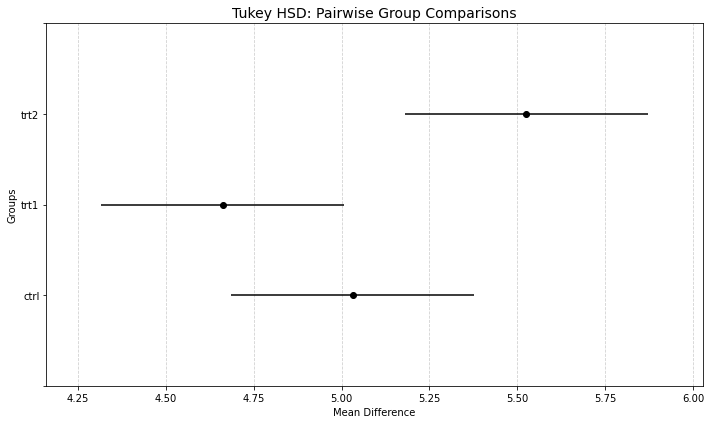

In [20]:
# Tukey's HSD test
posthoc = pairwise_tukeyhsd(endog=df['weight'], groups=df['group'], alpha=0.05)
print(posthoc)

# Custom Plot for Tukey's HSD
fig, ax = plt.subplots(figsize=(8, 6))
posthoc.plot_simultaneous(ax=ax, xlabel='Mean Difference', ylabel='Groups')
plt.title("Tukey HSD: Pairwise Group Comparisons", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Tukey's HSD Results:
- **ctrl vs. trt1**: Mean difference = -0.371, p = 0.3921 (Not significant).
- **ctrl vs. trt2**: Mean difference = 0.494, p = 0.198 (Not significant).
- **trt1 vs. trt2**: Mean difference = 0.865, p = 0.012 (Significant).

    
#### Interpretation:
- The comparison between `trt1` and `trt2` is significant (p = 0.012), indicating a statistically significant difference in their mean weights.
- The comparisons between `ctrl` and `trt1`, and between `ctrl` and `trt2`, are not significant, suggesting no substantial difference in their means.


#### Visualization:
The Tukey's HSD plot visually confirms that the mean difference between `trt1` and `trt2` is significant, as the confidence interval does not cross zero. The other group comparisons show overlapping intervals, indicating no significant difference.

### **8. Discussion**

### 8. Discussion

#### **Key Findings**
1. **t-Test Results:**
   - The independent t-test comparing `trt1` and `trt2` revealed a statistically significant difference in plant weights.
   - The p-value (0.0075) was well below the threshold of 0.05, indicating that the treatment applied in `trt2` had a stronger effect on plant growth than `trt1`.
   - This suggests that `trt2` may be a more effective treatment for promoting plant growth compared to `trt1`.
   

2. **ANOVA Results:**
   - The one-way ANOVA test identified significant differences among the three groups (`ctrl`, `trt1`, and `trt2`) with a p-value of 0.0159 (< 0.05).
   - This confirms that at least one group mean differs significantly from the others, warranting further investigation.
   

3. **Post-Hoc Analysis (Tukey’s HSD):**
   - Tukey’s HSD test pinpointed the specific difference between `trt1` and `trt2` as significant.
   - The differences between `ctrl` and the treatment groups (`trt1` and `trt2`) were not statistically significant.
   
#### **Strengths of the Analysis**
1. **Balanced Dataset:**
   - Each group contained an equal number of observations (n=10), reducing potential biases in the statistical tests.
   
   
2. **Validation of Assumptions:**
   - Assumptions of normality and homogeneity of variance were met, ensuring the validity of the t-test and ANOVA results.
   
   
3. **Comprehensive Testing:**
   - The use of both ANOVA and post-hoc analysis provided a robust approach to identifying and interpreting group differences.

   

### **9. Conclusion**


This project demonstrates the application of t-tests and ANOVA to evaluate experimental data.

This analysis demonstrates significant differences in plant weights across groups, emphasizing the impact of experimental treatments. While `trt1` and `trt2` showed specific differences, ANOVA highlighted overall group variability. Future studies could expand sample sizes for more robust conclusions.

### **10. References**

3. GeeksforGeeks: [ANOVA](https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/?ref=header_outind)
5. Matplotlib Documentation: [Visualization Techniques](https://matplotlib.org/stable/contents.html)
7. Nature Methods: [Best Practices in Statistical Data Analysis](https://www.nature.com/nmeth/)
8. NumPy Documentation: [Random Sampling Functions](https://numpy.org/doc/stable/reference/random/index.html)
9. Pandas Documentation: [DataFrame Operations](https://pandas.pydata.org/docs/)
10. Python Documentation: [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)
11. RealPython: [A Practical Guide to Data Visualization in Python](https://realpython.com)
12. Scipy Documentation: [scipy.stats.f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)
13. Scribbr: [One-Way ANOVA](https://www.scribbr.com/statistics/one-way-anova)
14. Seaborn Documentation: [Statistical Visualizations](https://seaborn.pydata.org/)
15. Stack Overflow: [Python Probability Calculations](https://stackoverflow.com/search?q=PYTHON+PROBABILITY&s=b2c4c94d-1c94-486c-bb89-ee5199fa6bfb)
16. Statology: [Understanding ANOVA](https://www.statology.org/anova/)
17. Statistics by Jim: [Understanding T-Tests](https://statisticsbyjim.com/hypothesis-testing/t-tests/)
18. Statistics How To: [Type I and Type II Errors](https://www.statisticshowto.com/probability-and-statistics/type-i-and-type-ii-errors/)
19. YouTube: [Follow Up ANOVA](https://www.youtube.com/watch?v=P1j2CkOjWtM)
20. Wikipedia: [Analysis of Variance](https://en.wikipedia.org/wiki/Analysis_of_variance)
